In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset

- Using load_digits function from sklearn import wines data
 - Take a look at the shape of image data
 - Import PCA, LDA and FactorAnalysis from Sklearn
 - Project data in 2 D space using the PCA, LDA and FactorAnalysis algorithm form sklearn
 - Take a look at the new data

---



In [5]:
wine = dataset.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
wine_df = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])

In [8]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [10]:
wine_df.shape

(178, 13)

In [15]:
from sklearn.decomposition import PCA

In [13]:
n_components = min(wine_df.shape[0],wine_df.shape[1])
n_components

13

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
standardized_data = ss.fit_transform(wine['data'])
standardized_data.shape

(178, 13)

In [32]:
pca = PCA(2)

In [33]:
pca_reduced = pca.fit_transform(standardized_data)

In [65]:
pca_reduced.shape

(178, 2)

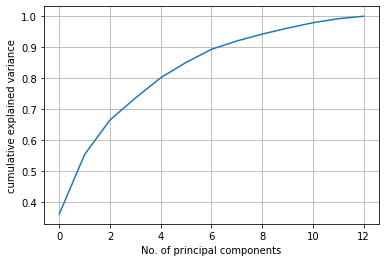

In [35]:
pca=PCA().fit(standardized_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of principal components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

Text(0, 0.5, 'Second Principal Component')

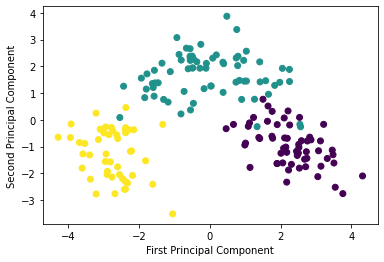

In [45]:
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c = wine['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda_reduced = lda.fit(wine.data,wine.target).transform(wine.data)

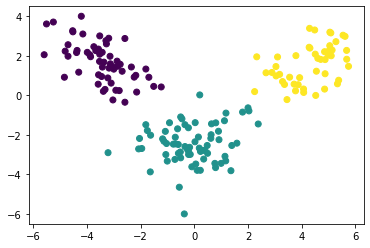

In [44]:
plt.scatter(lda_reduced[:,0],lda_reduced[:,1],c=wine.target)
plt.show()

In [69]:
from sklearn.decomposition import FactorAnalysis 
fa = FactorAnalysis(n_components=2)
fa_reduced = fa.fit(wine.data,wine.target).transform(wine.data)

In [72]:
fa_reduced.shape

(178, 2)

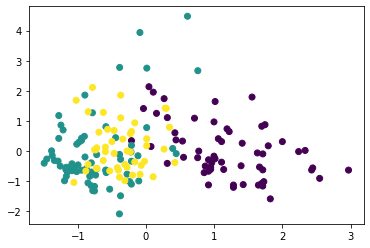

In [75]:
plt.scatter(fa_reduced[:,0],fa_reduced[:,1],c=wine.target)
plt.show()
